In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
# Loading the MNIST datasets - 60000 images for training and 10000 images for testing
(image_train, label_train), (image_test, label_test) = tf.keras.datasets.mnist.load_data()
# Splitting the training set into 2: 55000 images for training and 5000 images for validation
image_valid = image_train[55000:]
label_valid = label_train[55000:]
image_train = image_train[:55000]
label_train = label_train[:55000]

0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    51   159  253  159  50   0    0    0    0    0    0    0    0    
0    0    0    0    0    0    0    0    0    0    0    0    0    0    48   238  252  252  252  237  0    0    0    0    0    0    0    0    
0    0    0    0    0    0    0    0    0    0    0    0    0    54   227  253  252  239  233  252  57   6    0    0    0    0    0    0    
0    0    0  

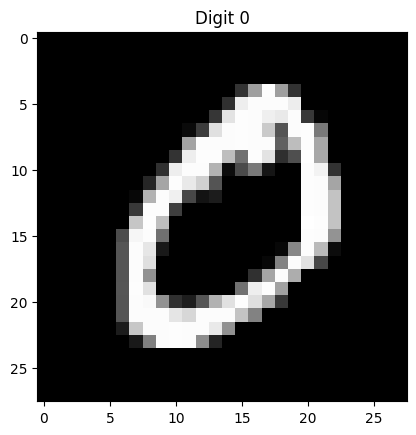

In [38]:
idx = 1
# Visualizing image array
image_arr = ""
for row in image_train[idx]:
    for col in row:
        if(len(str(col)) == 1):
            print(str(col) + "   ", end =" ")
            image_arr += str(col) + "   "
        elif(len(str(col)) == 2):
            print(str(col) + "  ", end =" ")
            image_arr += str(col) + "  "
        else:
            print(str(col) + " ", end =" ")
            image_arr += str(col) + " "
    print()
    image_arr += "\n"
with open("./test/image_arr.txt", "w") as file:
    file.write(image_arr)
# Plotting an image
plt.title(f"Digit {label_train[idx]}")
# Gray image
plt.imshow(image_train[idx], cmap='gray')
plt.savefig("./test/digit_grey.jpg")
# Black white
# plt.imshow(image_train[idx], cmap='binary') 
# plt.savefig("./test/digit_bw.jpg")

In [4]:
# Setting up the neural network architecture and hyperparameters
input_layer = 784  # input layer (28x28 pixels)
hidden_layer1 = 512  # 1st hidden layer (14x14 pixel)
hidden_layer2 = 256  # 2nd hidden layer
hidden_layer3 = 128  # 3rd hidden layer
output_layer = 10  # output layer (0-9 digits)

learning_rate = np.float_power(10, -4)
n_iterations = 1000
batch_size = 128
dropout = 0.5
print(learning_rate)

0.0001


In [57]:
# Simple softmax function implementation
def softmax(arr):
    e = np.exp(arr)
    return e / sum(e)

def f_loss():
    for idx in range(60000):
        # y = theta * x + b
        x = image_train[idx].reshape(784, 1)
        x = x / max(x) # Normalize the input
        
        y_cal = np.matmul(theta, x) + b
        
        y_given = np.zeros((10, 1))
        y_given[label_train[idx]] = 1
        
        # Loss function of index i-th = (softmax(y_cal) - y_given)^2 
        loss_function = np.power((softmax(y_cal) - y_given), 2)

theta = np.random.rand(784, 10)
theta = np.reshape(theta, (10, 784))
b = np.random.rand(10, 1)

for idx in range(5000):
    loss_function = f_loss(theta)
    
    print(loss_function)

[[3.29960565e-01]
 [8.37175010e-06]
 [4.54624870e-05]
 [7.45721714e-04]
 [1.26437005e-04]
 [6.84457638e-01]
 [1.45032754e-03]
 [9.88839418e-07]
 [1.69571801e-02]
 [1.25400908e-03]]
[[9.83313553e-01]
 [7.18035048e-10]
 [9.53298883e-02]
 [4.00967307e-07]
 [1.31728194e-05]
 [1.23352707e-04]
 [3.21848577e-05]
 [5.85869235e-06]
 [4.34274340e-01]
 [1.45787817e-07]]
[[4.42236763e-04]
 [3.75743042e-04]
 [2.65739587e-04]
 [1.59520882e-02]
 [9.21675623e-01]
 [7.02820142e-03]
 [2.77963235e-02]
 [1.40456100e-04]
 [2.11896509e-01]
 [2.94767663e-03]]
[[1.84748968e-03]
 [9.99520043e-01]
 [1.11668488e-06]
 [3.60954156e-03]
 [4.93649632e-03]
 [2.14007444e-01]
 [3.48203811e-02]
 [9.56434525e-05]
 [1.82643733e-02]
 [9.76192489e-04]]
[[1.94796693e-01]
 [6.30422648e-08]
 [3.79617491e-05]
 [3.39641970e-02]
 [2.94752497e-03]
 [9.87491743e-03]
 [1.16040020e-03]
 [1.07547274e-06]
 [2.24581014e-02]
 [9.42238412e-01]]
[[5.37318262e-06]
 [4.13205503e-10]
 [9.99058693e-01]
 [3.85236520e-04]
 [1.00012424e-01]
 [2.2